## Giant potentials

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import pingouin as pg
import numpy as np

/opt/miniconda3/envs/databs/lib/python3.8/site-packages/outdated/utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.3.6, the latest is 0.3.10.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(
/opt/miniconda3/envs/databs/lib/python3.8/site-packages/outdated/utils.py:14: OutdatedPackageWarning: The package outdated is out of date. Your version is 0.2.0, the latest is 0.2.1.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


In [3]:
gdp_df = pd.read_csv('/Users/labc02/Documents/PDCB_data/fgdp_analysis.csv')

Sample sizes

In [4]:
gdp_df.groupby('Genotype')['Date'].count()

Genotype
KO    7
WT    8
Name: Date, dtype: int64

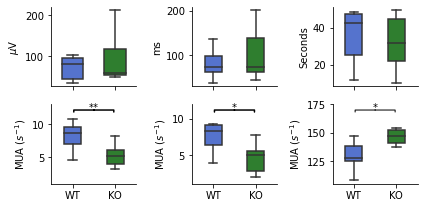

In [5]:
fig, axs = plt.subplots(2, 3, sharex = True, figsize = (6,3))

sns.boxplot(x = 'Genotype', y = 'fGDP_amp', data = gdp_df, palette = ['royalblue', 'forestgreen'], order = ['WT', 'KO'], width  = 0.5, ax = axs[0,0], showfliers = False)
sns.despine()
#axs[0,0].set_title('fGDP Amplitude')
axs[0,0].set_ylabel(r'$\mu$V')
axs[0,0].set_xlabel('')

sns.boxplot(x = 'Genotype', y = 'fGDP_halfwidth', data = gdp_df, palette = ['royalblue', 'forestgreen'], order = ['WT', 'KO'], width = 0.4, ax = axs[0,1], showfliers = False)
sns.despine()
#axs[0,1].set_title('fGDP Half-width')
axs[0,1].set_ylabel('ms')
axs[0,1].set_xlabel('')

sns.boxplot(x = 'Genotype', y = 'fGDP_interval', data = gdp_df, palette = ['royalblue', 'forestgreen'], order = ['WT', 'KO'], width = 0.4, ax = axs[0,2], showfliers = False)
sns.despine()
#axs[0,2].set_title('fGDP Interval')
axs[0,2].set_ylabel('Seconds')
axs[0,2].set_xlabel('')

sns.boxplot(x = 'Genotype', y = 'MUA_fq', data = gdp_df, palette = ['royalblue', 'forestgreen'], order = ['WT', 'KO'], width = 0.4, ax = axs[1,0], showfliers = False)
sns.despine()
axs[1,0].set_ylim(1,13)
axs[1,0].annotate('**', xy=(0.5, .93), xytext=(0.5, 1.02), fontsize = 10, xycoords='axes fraction', ha='center',
                va='top', arrowprops=dict(arrowstyle='-[, widthB=2, lengthB=.2', lw=1.5, color='k'))
#axs[1,0].set_title('MUA')
axs[1,0].set_ylabel(r'MUA ($s^{-1}$)')
axs[1,0].set_xlabel('')

sns.boxplot(x = 'Genotype', y = 'inter_fGDP_MUA_fq', data = gdp_df, palette = ['royalblue', 'forestgreen'], order = ['WT', 'KO'], width = 0.4, ax = axs[1,1], showfliers = False)
sns.despine()
axs[1,1].set_ylim(1,12)
axs[1,1].annotate('*', xy=(0.5, .93), xytext=(0.5, 1.02), fontsize = 10, xycoords='axes fraction', ha='center',
                va='top', arrowprops=dict(arrowstyle='-[, widthB=2, lengthB=.2', lw=1.5, color='k'))
#axs[1,1].set_title('inter fGDP MUA')
axs[1,1].set_ylabel(r'MUA ($s^{-1}$)')
axs[1,1].set_xlabel('')

sns.boxplot(x = 'Genotype', y = 'intra_fGDP_MUA_fq', data = gdp_df, palette = ['royalblue', 'forestgreen'], order = ['WT', 'KO'], width = 0.4, ax = axs[1,2], showfliers = False)
sns.despine()
axs[1,2].set_ylim(105,175)
axs[1,2].annotate('*', xy=(0.5, .93), xytext=(0.5, 1.02), fontsize = 10, xycoords='axes fraction', ha='center',
                va='top', arrowprops=dict(arrowstyle='-[, widthB=2, lengthB=.2', lw=1, color='k'))
#axs[1,2].set_title('intra fGDP MUA')
axs[1,2].set_ylabel(r'MUA ($s^{-1}$)')
axs[1,2].set_xlabel('')

plt.tight_layout()


In [72]:
fig.savefig('/Users/labc02/Documents/PDCB_data/Behavior/Figures/fGDP_fig_paper.svg')

### Amplitude

In [6]:
pg.normality(data = gdp_df, dv = 'fGDP_amp', group = 'Genotype')

,W,pval,normal
WT,0.850656,0.096738,True
KO,0.751247,0.013074,False


In [7]:
WT_median = gdp_df['fGDP_amp'][gdp_df['Genotype'] == 'WT'].median()
#WT_sem = of_raw['Resting_Time_Total'][of_raw['Genotype'] == 'WT'].sem()
KO_median = gdp_df['fGDP_amp'][gdp_df['Genotype'] == 'KO'].median()
#KO_sem = of_raw['Resting_Time_Total'][of_raw['Genotype'] == 'KO'].sem()
print(f'Amplitude: \n WT median: {WT_median} \n KO median: {KO_median}')

Amplitude: 
 WT median: 82.5235 
 KO median: 60.33


In [8]:
pg.mwu(x = gdp_df['fGDP_amp'][gdp_df['Genotype'] == 'WT'], y = gdp_df['fGDP_amp'][gdp_df['Genotype'] == 'KO'])

,U-val,tail,p-val,RBC,CLES
MWU,25.0,two-sided,0.772337,0.107143,0.553571


No differences

### Half-width

In [9]:
pg.normality(data = gdp_df, dv = 'fGDP_halfwidth', group = 'Genotype')

,W,pval,normal
WT,0.866608,0.139611,True
KO,0.888963,0.269298,True


In [10]:
WT_mean = gdp_df['fGDP_halfwidth'][gdp_df['Genotype'] == 'WT'].mean()
WT_sem = gdp_df['fGDP_halfwidth'][gdp_df['Genotype'] == 'WT'].sem()
KO_mean = gdp_df['fGDP_halfwidth'][gdp_df['Genotype'] == 'KO'].mean()
KO_sem = gdp_df['fGDP_halfwidth'][gdp_df['Genotype'] == 'KO'].sem()
print(f'Half-width: \n WT mean: {WT_mean}, +- {WT_sem} SEM \n KO mean: {KO_mean}, +- {KO_sem} SEM')

Half-width: 
 WT mean: 87.17, +- 16.96140082237145 SEM 
 KO mean: 102.54714285714286, +- 21.912049491664852 SEM


In [11]:
pg.ttest(x = gdp_df['fGDP_halfwidth'][gdp_df['Genotype'] == 'WT'], y = gdp_df['fGDP_halfwidth'][gdp_df['Genotype'] == 'KO'])

,T,dof,tail,p-val,CI95%,cohen-d,BF10,power
T-test,-0.554937,11.733521,two-sided,0.58936,"[-75.9, 45.15]",0.291095,0.485,0.08176


No differences

### Interval

In [12]:
pg.normality(data = gdp_df, dv = 'fGDP_interval', group = 'Genotype')

,W,pval,normal
WT,0.863930,0.131365,True
KO,0.912896,0.416288,True


In [13]:
WT_mean = gdp_df['fGDP_interval'][gdp_df['Genotype'] == 'WT'].mean()
WT_sem = gdp_df['fGDP_interval'][gdp_df['Genotype'] == 'WT'].sem()
KO_mean = gdp_df['fGDP_interval'][gdp_df['Genotype'] == 'KO'].mean()
KO_sem = gdp_df['fGDP_interval'][gdp_df['Genotype'] == 'KO'].sem()
print(f'Interval: \n WT mean: {WT_mean}, +- {WT_sem} SEM \n KO mean: {KO_mean}, +- {KO_sem} SEM')

Interval: 
 WT mean: 42.38875, +- 9.599028306013212 SEM 
 KO mean: 31.919285714285714, +- 5.8065983022366385 SEM


In [14]:
pg.ttest(x = gdp_df['fGDP_interval'][gdp_df['Genotype'] == 'WT'], y = gdp_df['fGDP_interval'][gdp_df['Genotype'] == 'KO'])

,T,dof,tail,p-val,CI95%,cohen-d,BF10,power
T-test,0.93322,11.29565,two-sided,0.370226,"[-14.14, 35.08]",0.465495,0.582,0.132781


No differences

### MUA General

All MUA

In [15]:
pg.normality(data = gdp_df, dv = 'MUA_fq', group = 'Genotype')

,W,pval,normal
WT,0.956179,0.773019,True
KO,0.944131,0.676160,True


In [16]:
WT_mean = gdp_df['MUA_fq'][gdp_df['Genotype'] == 'WT'].mean()
WT_sem = gdp_df['MUA_fq'][gdp_df['Genotype'] == 'WT'].sem()
KO_mean = gdp_df['MUA_fq'][gdp_df['Genotype'] == 'KO'].mean()
KO_sem = gdp_df['MUA_fq'][gdp_df['Genotype'] == 'KO'].sem()
print(f'MUA frequency: \n WT mean: {WT_mean}, +- {WT_sem} SEM \n KO mean: {KO_mean}, +- {KO_sem} SEM')

MUA frequency: 
 WT mean: 8.2675, +- 0.7020702803647426 SEM 
 KO mean: 5.275714285714286, +- 0.6739501788243808 SEM


In [17]:
pg.ttest(x = gdp_df['MUA_fq'][gdp_df['Genotype'] == 'WT'], y = gdp_df['MUA_fq'][gdp_df['Genotype'] == 'KO'])

,T,dof,tail,p-val,CI95%,cohen-d,BF10,power
T-test,3.074184,12.983009,two-sided,0.008889,"[0.89, 5.09]",1.578846,5.672,0.804936


Significant differences in overall MUA.

### MUA inter-GDP

"Spontaneous" MUA in between GDPs

In [18]:
pg.normality(data = gdp_df, dv = 'inter_fGDP_MUA_fq', group = 'Genotype')

,W,pval,normal
WT,0.856575,0.110972,True
KO,0.937613,0.617325,True


In [19]:
WT_mean = gdp_df['inter_fGDP_MUA_fq'][gdp_df['Genotype'] == 'WT'].mean()
WT_sem = gdp_df['inter_fGDP_MUA_fq'][gdp_df['Genotype'] == 'WT'].sem()
KO_mean = gdp_df['inter_fGDP_MUA_fq'][gdp_df['Genotype'] == 'KO'].mean()
KO_sem = gdp_df['inter_fGDP_MUA_fq'][gdp_df['Genotype'] == 'KO'].sem()
print(f'inter fGDP MUA frequency: \n WT mean: {WT_mean}, +- {WT_sem} SEM \n KO mean: {KO_mean}, +- {KO_sem} SEM')

inter fGDP MUA frequency: 
 WT mean: 7.61875, +- 0.6797122224567856 SEM 
 KO mean: 4.492857142857143, +- 0.7758887815663688 SEM


In [20]:
pg.ttest(x = gdp_df['inter_fGDP_MUA_fq'][gdp_df['Genotype'] == 'WT'], y = gdp_df['inter_fGDP_MUA_fq'][gdp_df['Genotype'] == 'KO'])

,T,dof,tail,p-val,CI95%,cohen-d,BF10,power
T-test,3.030406,12.455339,two-sided,0.010074,"[0.89, 5.36]",1.575777,5.343,0.80343


Significant differences in MUA activity in between fGDPs.

Consistent with overall MUA

### MUA intra-GDP

MUA frequency during fGDPs

In [21]:
ko_outliers = pg.madmedianrule(gdp_df['intra_fGDP_MUA_fq'][gdp_df['Genotype']=='KO'])

In [22]:
gdp_df['intra_fGDP_MUA_fq'].iloc[7] = np.nan

/opt/miniconda3/envs/databs/lib/python3.8/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [23]:
pg.normality(data = gdp_df, dv = 'intra_fGDP_MUA_fq', group = 'Genotype')

,W,pval,normal
WT,0.940087,0.611941,True
KO,0.786741,0.044509,False


In [24]:
WT_median = gdp_df['intra_fGDP_MUA_fq'][gdp_df['Genotype'] == 'WT'].median()
#WT_sem = of_raw['Resting_Time_Total'][of_raw['Genotype'] == 'WT'].sem()
KO_median = gdp_df['intra_fGDP_MUA_fq'][gdp_df['Genotype'] == 'KO'].median()
#KO_sem = of_raw['Resting_Time_Total'][of_raw['Genotype'] == 'KO'].sem()
print(f'Intra fGDPs MUA frequency: \n WT median: {WT_median} \n KO median: {KO_median}')

Intra fGDPs MUA frequency: 
 WT median: 127.625 
 KO median: 149.255


In [25]:
pg.mwu(x = gdp_df['intra_fGDP_MUA_fq'][gdp_df['Genotype'] == 'WT'], y = gdp_df['intra_fGDP_MUA_fq'][gdp_df['Genotype'] == 'KO'])

,U-val,tail,p-val,RBC,CLES
MWU,5.0,two-sided,0.016925,0.791667,0.895833


Significant differences in MUA frequency during fGDPs, but the relationship is inversed; KOs have a higher MUA frequency during fGDPs

### Population rate correlation with fGDP

In [26]:
pg.normality(data = gdp_df, dv = 'Correlation', group = 'Genotype')

,W,pval,normal
WT,0.954897,0.760335,True
KO,0.944532,0.679819,True


In [27]:
WT_mean = gdp_df['Correlation'][gdp_df['Genotype'] == 'WT'].mean()
WT_sem = gdp_df['Correlation'][gdp_df['Genotype'] == 'WT'].sem()
KO_mean = gdp_df['Correlation'][gdp_df['Genotype'] == 'KO'].mean()
KO_sem = gdp_df['Correlation'][gdp_df['Genotype'] == 'KO'].sem()
print(f'Correlation: \n WT mean: {WT_mean}, +- {WT_sem} SEM \n KO mean: {KO_mean}, +- {KO_sem} SEM')

Correlation: 
 WT mean: 0.5262500000000001, +- 0.03835629488288536 SEM 
 KO mean: 0.6628571428571429, +- 0.06545497491785172 SEM


In [28]:
pg.ttest(x = gdp_df['Correlation'][gdp_df['Genotype'] == 'WT'], y = gdp_df['Correlation'][gdp_df['Genotype'] == 'KO'], tail = 'one-sided')

,T,dof,tail,p-val,CI95%,cohen-d,BF10,power
T-test,-1.800651,9.834224,less,0.051225,"[-inf, 0.0]",0.961658,2.386,0.54596


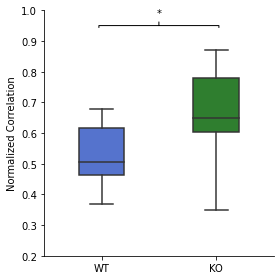

In [31]:
cor_fig = plt.figure(figsize = (4, 4))
sns.boxplot(x = 'Genotype', y = 'Correlation', data = gdp_df, palette = ['royalblue', 'forestgreen'], order = ['WT', 'KO'], width = 0.4, showfliers = True)
sns.despine()
plt.ylim(0.2, 1)
plt.annotate('*', xy=(0.5, .93), xytext=(0.5, 1.01), fontsize = 10, xycoords='axes fraction', ha='center',
                va='top', arrowprops=dict(arrowstyle='-[, widthB=6, lengthB=.2', lw=1, color='k'))
#axs[1,2].set_title('intra fGDP MUA')
plt.ylabel('Normalized Correlation')
plt.xlabel('')
plt.tight_layout()

In [44]:
cor_fig.savefig('/Users/labc02/Documents/PDCB_data/Behavior/Figures/fGDP_cor.svg')